In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_path = "../Dados/wfp_food_prices_ukr.csv"

food_ukr_data = pd.read_csv(file_path,  dtype='unicode')
food_ukr_data = food_ukr_data[1:]

display(food_ukr_data)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (rye),Loaf,actual,Retail,UAH,4.96,0.4744
2,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (wheat),Loaf,actual,Retail,UAH,4.84,0.4629
3,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Buckwheat grits,KG,actual,Retail,UAH,7.44,0.7119
4,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Pasta,KG,actual,Retail,UAH,5.34,0.5105
5,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Potatoes,KG,actual,Retail,UAH,6.74,0.6447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95496,2023-07-15,Zhytomyrska,Zhytomyrska,Zhytomyr,50.25465,28.658667,vegetables and fruits,Apples,KG,forecast,Retail,UAH,0.0,0.0
95497,2023-07-15,Zhytomyrska,Zhytomyrska,Zhytomyr,50.25465,28.658667,vegetables and fruits,Beetroots,KG,forecast,Retail,UAH,0.0,0.0
95498,2023-07-15,Zhytomyrska,Zhytomyrska,Zhytomyr,50.25465,28.658667,vegetables and fruits,Cabbage,KG,forecast,Retail,UAH,0.0,0.0
95499,2023-07-15,Zhytomyrska,Zhytomyrska,Zhytomyr,50.25465,28.658667,vegetables and fruits,Carrots,KG,forecast,Retail,UAH,0.0,0.0


In [3]:
attrs = ['date', 'market', 'category', 'commodity', 'price', 'usdprice']

aux = food_ukr_data[food_ukr_data['priceflag'] == 'actual']

food_data = aux[attrs].copy()
food_data[['price', 'usdprice']] = food_data.loc[:, ('price', 'usdprice')].apply(pd.to_numeric)


display(food_data)

,date,market,category,commodity,price,usdprice
1,2014-03-15,National Average,cereals and tubers,Bread (rye),4.96,0.4744
2,2014-03-15,National Average,cereals and tubers,Bread (wheat),4.84,0.4629
3,2014-03-15,National Average,cereals and tubers,Buckwheat grits,7.44,0.7119
4,2014-03-15,National Average,cereals and tubers,Pasta,5.34,0.5105
5,2014-03-15,National Average,cereals and tubers,Potatoes,6.74,0.6447
...,...,...,...,...,...,...
77511,2023-01-15,Zhytomyr,vegetables and fruits,Apples,16.23,0.4438
77512,2023-01-15,Zhytomyr,vegetables and fruits,Beetroots,11.06,0.3024
77513,2023-01-15,Zhytomyr,vegetables and fruits,Cabbage,12.56,0.3435
77514,2023-01-15,Zhytomyr,vegetables and fruits,Carrots,22.19,0.6068


In [4]:
markets = food_data.market.unique().tolist()

print(markets)

['National Average', 'Crimea', 'Cherkasy', 'Chernihiv', 'Chernivtsi', 'Dnipropetrovsk', 'Donetsk', 'Iv.-Frankivsk', 'Kharkiv', 'Kherson', 'Khmelnytskiy', 'Kirovohrad', 'Kyiv', 'Kyiv city', 'Luhansk', 'Lviv', 'Mykolayiv', 'Odesa', 'Poltava', 'Rivne', 'm. Sevastopol', 'Sumy', 'Ternopyl', 'Vinnytsya', 'Volyn', 'Zakarpattya', 'Zaporizhzhya', 'Zhytomyr']


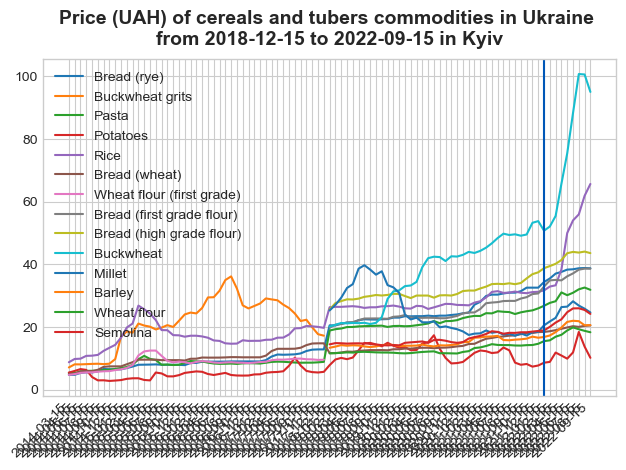

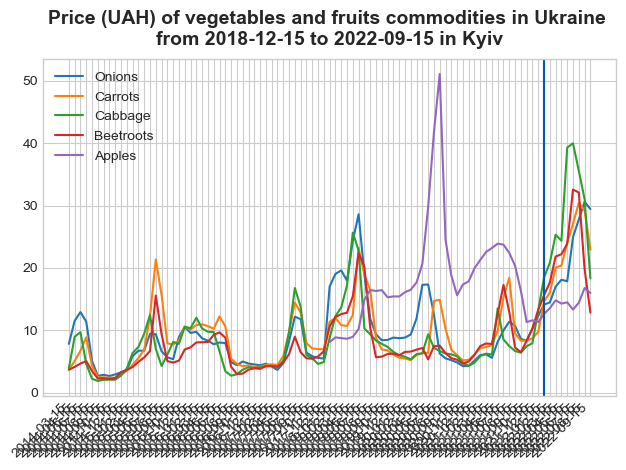

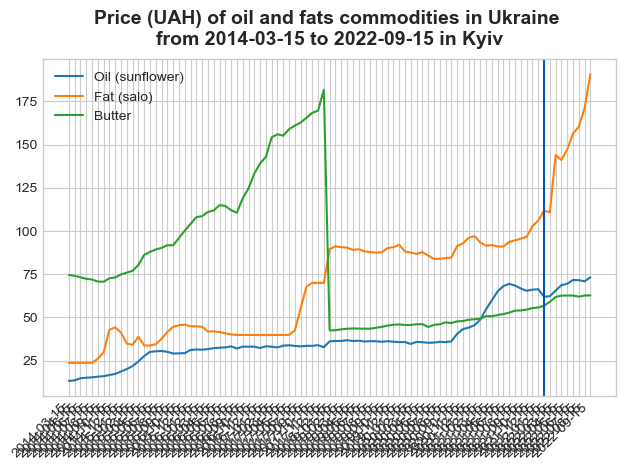

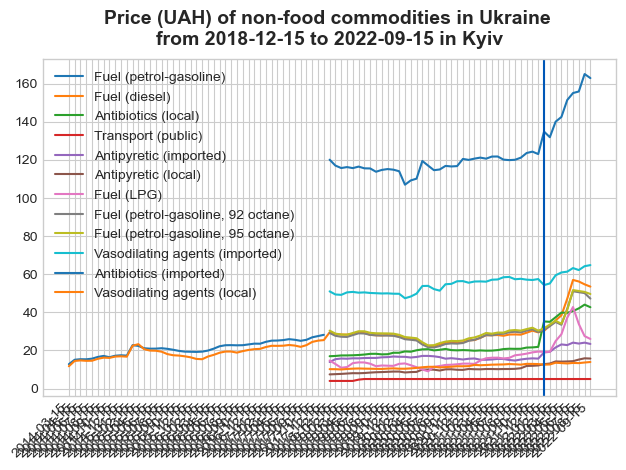

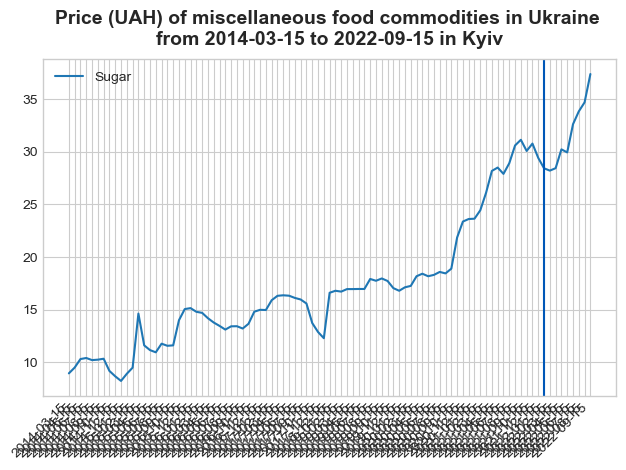

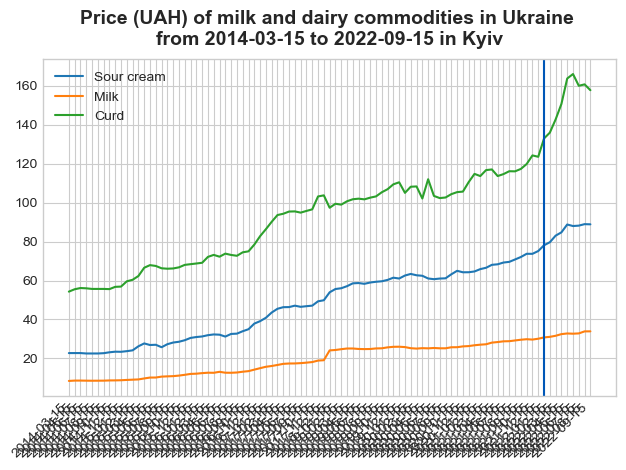

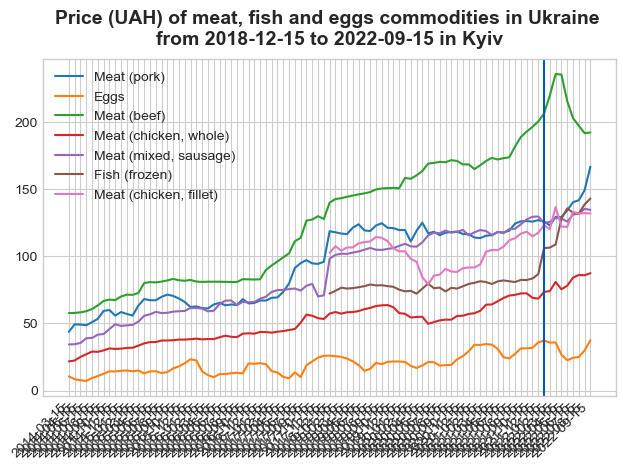

In [22]:
capital_data = food_data[food_data["market"] == 'Kyiv']

capital_data = capital_data.sort_values(by='date')

categories = capital_data.category.unique().tolist()

war_start_date = '2022-01-15' # data mais próxima do início da guerra

for category in categories:    
    cat_aux = capital_data[capital_data["category"] == category]
    commodity = cat_aux.commodity.unique().tolist()

    for label in commodity:
        aux = cat_aux[cat_aux["commodity"] == label]

        date_aux = aux.date.tolist()
        price_aux = aux.price.tolist()

        plt.plot(date_aux, price_aux, label=label)
    
    plt.axvline(x = war_start_date, color = '#0057b7')
    plt.xticks(rotation = 45, ha='right')
    plt.title(f"Price (UAH) of {category} commodities in Ukraine \nfrom {date_aux[0]} to {date_aux[-1]} in Kyiv")
    plt.legend()
    plt.show()


In [6]:
display(food_data)

,date,market,category,commodity,price,usdprice
1,2014-03-15,National Average,cereals and tubers,Bread (rye),4.96,0.4744
2,2014-03-15,National Average,cereals and tubers,Bread (wheat),4.84,0.4629
3,2014-03-15,National Average,cereals and tubers,Buckwheat grits,7.44,0.7119
4,2014-03-15,National Average,cereals and tubers,Pasta,5.34,0.5105
5,2014-03-15,National Average,cereals and tubers,Potatoes,6.74,0.6447
...,...,...,...,...,...,...
77511,2023-01-15,Zhytomyr,vegetables and fruits,Apples,16.23,0.4438
77512,2023-01-15,Zhytomyr,vegetables and fruits,Beetroots,11.06,0.3024
77513,2023-01-15,Zhytomyr,vegetables and fruits,Cabbage,12.56,0.3435
77514,2023-01-15,Zhytomyr,vegetables and fruits,Carrots,22.19,0.6068


In [7]:
categories = ["cereals and tubers", "vegetables and fruits"]

commodities_data = food_data[food_data['category'].isin(categories)].reset_index()

display(commodities_data)

,index,date,market,category,commodity,price,usdprice
0,1,2014-03-15,National Average,cereals and tubers,Bread (rye),4.96,0.4744
1,2,2014-03-15,National Average,cereals and tubers,Bread (wheat),4.84,0.4629
2,3,2014-03-15,National Average,cereals and tubers,Buckwheat grits,7.44,0.7119
3,4,2014-03-15,National Average,cereals and tubers,Pasta,5.34,0.5105
4,5,2014-03-15,National Average,cereals and tubers,Potatoes,6.74,0.6447
...,...,...,...,...,...,...,...
32153,77511,2023-01-15,Zhytomyr,vegetables and fruits,Apples,16.23,0.4438
32154,77512,2023-01-15,Zhytomyr,vegetables and fruits,Beetroots,11.06,0.3024
32155,77513,2023-01-15,Zhytomyr,vegetables and fruits,Cabbage,12.56,0.3435
32156,77514,2023-01-15,Zhytomyr,vegetables and fruits,Carrots,22.19,0.6068
